In [32]:
import json
import pandas as pd
import numpy as np
import openai
import openai
import json
import ast
import os
import time

OPENAI_API_KEY="57c0bc4615264d169cef668353b93c9b"
# OPENAI_API_VERSION="2023-05-15"
OPENAI_API_VERSION = "2024-02-15-preview"
OPENAI_API_ENDPOINT="https://zihan-us-2.openai.azure.com/"

def send_prompt(prompt, model = "gpt-35-turbo", is_json=False):
    if is_json:
        response = client.chat.completions.create(
            model= model, # model = "deployment_name".
            response_format={ "type": "json_object" },
            messages=[{"role": "user", "content": prompt}]
        )
    else:
        response = client.chat.completions.create(
            model= model, # model = "deployment_name".
            messages=[{"role": "user", "content": prompt}]
        )
    resp =response.choices[0].message.content
    return resp

def send_messages(messages, model = "gpt-35-turbo", is_json=False):
    if is_json:
        response = client.chat.completions.create(
            model= model,
            response_format={ "type": "json_object" },
            messages=messages
        )
    else:
        response = client.chat.completions.create(
            model= model,
            messages=messages
        )
    resp =response.choices[0].message.content
    return resp

def parse_to_json(resp):
    return json.loads(resp)

client = openai.AzureOpenAI(
    api_key = OPENAI_API_KEY,
    api_version = OPENAI_API_VERSION,
    azure_endpoint = OPENAI_API_ENDPOINT,
)

In [3]:
df1 = pd.read_csv("data-4-separate.csv")

In [6]:
df2 = pd.read_csv("data-4-1.csv")
df2.head()

,Name,Sage,Stroy_data,Decision_making_data,Conversation_data,Group_data,Sage_data
0,Anoushka,without,"[""In the enchanting world of magic, you step i...",[{'question': 'You enter your sixth year at Ho...,"[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': ""I've been thi...",NaN
1,Anoushka,with,"['In the mystical realm of The Witcher, you be...","[{'question': ""As time passes, political intri...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Eleanor', 'content': ""Geralt, i...",{'_id': 'ebc46813-dc96-4e16-b85f-8f12a6e41fe9'...
2,Chenghao Shi,without,"[""In the enchanting world of magic, you step i...",[],[],[],NaN
3,Chenghao Shi,with,"[""In the enchanting world of magic, you step i...","[{'question': ""As you enter your seventh and f...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Hermione', 'content': ""Alright,...",{'_id': '99778797-7a48-4470-8fb3-61ed2e5e655f'...
4,Hamidreza Saffari,without,"[""In the enchanting world of magic, you step i...",[{'question': 'Years have passed since the Bat...,"[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': ""Hey Harry, di...",NaN


In [37]:
df2 =  df2.sort_values(by=['Name', 'Sage'])
df2

,Name,Sage,Stroy_data,Decision_making_data,Conversation_data,Group_data,Sage_data
1,Anoushka,with,"['In the mystical realm of The Witcher, you be...","[{'question': ""As time passes, political intri...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Eleanor', 'content': ""Geralt, i...",{'_id': 'ebc46813-dc96-4e16-b85f-8f12a6e41fe9'...
0,Anoushka,without,"[""In the enchanting world of magic, you step i...",[{'question': 'You enter your sixth year at Ho...,"[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': ""I've been thi...",NaN
3,Chenghao Shi,with,"[""In the enchanting world of magic, you step i...","[{'question': ""As you enter your seventh and f...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Hermione', 'content': ""Alright,...",{'_id': '99778797-7a48-4470-8fb3-61ed2e5e655f'...
2,Chenghao Shi,without,"[""In the enchanting world of magic, you step i...",[],[],[],NaN
5,Hamidreza Saffari,with,"[""In the enchanting world of magic, you step i...",[{'question': 'You are now in your sixth year ...,"[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': 'Hey Harry, ha...",{'_id': '5275ea61-6078-4111-b676-1d23fd53d2e2'...
4,Hamidreza Saffari,without,"[""In the enchanting world of magic, you step i...",[{'question': 'Years have passed since the Bat...,"[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': ""Hey Harry, di...",NaN
7,Hanlin Shi,with,"[""In the enchanting world of magic, you step i...","[{'question': 'As the new school year begins, ...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': 'Hey Harry, ha...",{'_id': '5a005a7d-d829-4f18-935d-bff389eae4c0'...
6,Hanlin Shi,without,"[""In the enchanting world of magic, you step i...",[{'question': 'As you enter your next year at ...,"[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': ""Alright, let'...",NaN
8,Honglei Hu,with,"[""Lin, you have been on quite a journey since ...","[{'question': 'As time passes, you continue to...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Alex', 'content': 'I think our ...",{'_id': '91846dd6-7d33-4227-85f3-f2fca7221ef6'...
9,Honglei Hu,without,"[""In the enchanting world of magic, you step i...","[{'question': 'In your sixth year at Hogwarts,...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Luna Lovegood', 'content': 'I b...",NaN


## story 3.5

In [31]:
settings = "You are a helping assistant. Your task is to assist me in evaluating a series of stories. For each story I provide, along with a specific question, you will support me by offering a rating on a scale from 1 to 7."

instruction = """Please read the story provided and then rate your experience by answering the questions below. Use a 7-point Likert scale for your ratings, where a score of 1 reflects one extreme of the scale and a score of 7 reflects the opposite extreme. Return your response in following JSON format: {{"Rating": <INT>}}."""

questions = [
 "How clearly could you visualize the story's events as you read? Rate from 1 (could not visualize at all) to 7 (visualized very clearly).",

  "How distracted were you by surrounding activities while reading the story? Rate from 1 (very distracted) to 7 (not distracted at all).",

  "Could you imagine yourself within the story's scenes? Rate from 1 (not at all) to 7 (very much so).",

 "How mentally engaged were you with the story as you read? Rate from 1 (not at all engaged) to 7 (very engaged).",

 "How easily could you stop thinking about the story after finishing it? Rate from 1 (very easily) to 7 (not easily at all).",

  "How eager were you to find out the ending of the story? Rate from 1 (not eager at all) to 7 (very eager).",

  "How emotionally impacted were you by the story? Rate from 1 (not impacted at all) to 7 (very impacted).",

  "Did you find yourself contemplating alternative endings or developments for the story? Rate from 1 (not at all) to 7 (very much).",

  "How often did your mind wander while reading the story? Rate from 1 (often wandered) to 7 (did not wander at all).",

  "To what extent do you find the story's events relevant to your daily life? Rate from 1 (not relevant at all) to 7 (very relevant).",

  "Has the story changed your life in any significant way? Rate from 1 (not at all) to 7 (significantly).",
]

In [34]:
def get_res(prompt):
    response = client.chat.completions.create(
      model="gpt-35-turbo",
      messages=[
        {"role": "system", "content": settings},
        {"role": "user", "content":prompt},
      ]
    )
    print(response.choices[0].message.content)
    return parse_to_json(response.choices[0].message.content)

In [48]:
for i in range(len(questions)):
    col_name = "q"+str(i+1)
    df2[col_name] = ""
    for row in range(len(df2)):
        prompt = instruction + "  Question: {{" + questions[i]  + "}}  Story: {{" + df1.iloc[row]["Stroy_data"] + "}}"
        try:
            res = get_res(prompt)
            df2.loc[row,col_name] = res["Rating"]
        except Exception as e:
            print("row:", row, "  q:", col_name)
        time.sleep(5)

{"Rating": 5}
{"Rating": 6}
{"Rating": 5}
{"Rating": 6}
row: 4   q: q1
{"Rating": 6}
{"Rating": 5}
{"Rating": 6}
{"Rating": 6}
{"Rating": 6}
{"Rating": 6}
{"Rating": 6}
{"Rating": 7}
{"Rating": 4}
{"Rating": 7}
{"Rating": 6}
{"Rating": 4}
{"Rating": 6}
{"Rating": 7}
{"Rating": 6}
{"Rating": 6}
{"Rating": 6}
{"Rating": 6}
{"Rating": 6}
{"Rating": 7}
{"Rating": 7}
{"Rating": 6}
{"Rating": 6}
{"Rating": 6}
{"Rating": 6}
{"Rating": 5}
{"Rating": 6}
{"Rating": 6}
{"Rating": 6}
{"Rating": 6}
{"Rating": 6}
{"Rating": 6}
{"Rating": 6}
{"Rating": 6}
{"Rating": 6}
row: 4   q: q2
{"Rating": 5}
{"Rating": 6}
{"Rating": 6}
{"Rating": 5}
{"Rating": 6}
{"Rating": 6}
{"Rating": 4}
{"Rating": 5}
{"Rating": 4}
{"Rating": 4}
{"Rating": 7}
{"Rating": 3}
{"Rating": 6}
{"Rating": 5}
{"Rating": 6}
{"Rating": 6}
{"Rating": 5}
{"Rating": 6}
{"Rating": 5}
{"Rating": 6}
{"Rating": 6}
{"Rating": 6}
{"Rating": 5}
{"Rating": 4}
{"Rating": 5}
{"Rating": 5}
{"Rating": 4}
{"Rating": 5}
{"Rating": 4}
{"Rating": 6}
{"Ra

In [50]:
df2.to_csv("data-story.csv")

In [66]:
df2 = pd.read_csv("data-story.csv", encoding='ISO-8859-1')

In [69]:
df2

,Name,Sage,Stroy_data,Decision_making_data,Conversation_data,Group_data,Sage_data,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11
0,Anoushka,with,"['In the mystical realm of The Witcher, you be...","[{'question': ""As time passes, political intri...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Eleanor', 'content': ""Geralt, i...",{'_id': 'ebc46813-dc96-4e16-b85f-8f12a6e41fe9'...,6.0,6.0,6.0,6.0,4.0,6.0,6.0,7.0,5.0,5.0,6.0
1,Anoushka,without,"[""In the enchanting world of magic, you step i...",[{'question': 'You enter your sixth year at Ho...,"[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': ""I've been thi...",NaN,5.0,6.0,6.0,6.0,7.0,6.0,6.0,6.0,6.0,5.0,6.0
2,Chenghao Shi,with,"[""In the enchanting world of magic, you step i...","[{'question': ""As you enter your seventh and f...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Hermione', 'content': ""Alright,...",{'_id': '99778797-7a48-4470-8fb3-61ed2e5e655f'...,6.0,6.0,7.0,7.0,5.0,6.0,6.0,7.0,3.0,6.0,6.0
3,Chenghao Shi,without,"[""In the enchanting world of magic, you step i...",[],[],[],NaN,5.0,6.0,5.0,5.0,6.0,6.0,5.0,6.0,6.0,4.0,6.0
4,Hamidreza Saffari,with,"[""In the enchanting world of magic, you step i...",[{'question': 'You are now in your sixth year ...,"[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': 'Hey Harry, ha...",{'_id': '5275ea61-6078-4111-b676-1d23fd53d2e2'...,6.0,5.0,6.0,6.0,2.0,6.0,6.0,6.0,6.0,5.0,5.0
5,Hamidreza Saffari,without,"[""In the enchanting world of magic, you step i...",[{'question': 'Years have passed since the Bat...,"[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': ""Hey Harry, di...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Hanlin Shi,with,"[""In the enchanting world of magic, you step i...","[{'question': 'As the new school year begins, ...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': 'Hey Harry, ha...",{'_id': '5a005a7d-d829-4f18-935d-bff389eae4c0'...,6.0,6.0,6.0,6.0,1.0,5.0,6.0,5.0,4.0,4.0,5.0
7,Hanlin Shi,without,"[""In the enchanting world of magic, you step i...",[{'question': 'As you enter your next year at ...,"[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': ""Alright, let'...",NaN,5.0,6.0,6.0,6.0,5.0,5.0,6.0,6.0,3.0,6.0,5.0
8,Honglei Hu,with,"[""Lin, you have been on quite a journey since ...","[{'question': 'As time passes, you continue to...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Alex', 'content': 'I think our ...",{'_id': '91846dd6-7d33-4227-85f3-f2fca7221ef6'...,6.0,5.0,5.0,6.0,3.0,5.0,6.0,5.0,5.0,5.0,2.0
9,Honglei Hu,without,"[""In the enchanting world of magic, you step i...","[{'question': 'In your sixth year at Hogwarts,...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Luna Lovegood', 'content': 'I b...",NaN,6.0,6.0,5.0,7.0,6.0,6.0,6.0,6.0,5.0,6.0,4.0


In [71]:
for i in range(len(questions)):
    col_name = "q"+str(i+1)

    prompt = instruction + "  Question: {{" + questions[i]  + "}}  Story: {{" + df1.iloc[5]["Stroy_data"][:-100] + "}}"
    try:
        res = get_res(prompt)
        df2.loc[5,col_name] = res["Rating"]
    except Exception as e:
        print("row:", 5, "  q:", col_name)
    time.sleep(5)

{"Rating": 7}
{"Rating": 6}
{"Rating": 7}
{"Rating": 5}
{"Rating": 6}
{"Rating": 7}
{"Rating": 5}
{"Rating": 6}
{"Rating": 4}
{"Rating": 6}
{"Rating": 4}


In [73]:
df2.to_csv("data-story.csv")

## story 4

In [ ]:
settings = "You are a helping assistant. Your task is to assist me in evaluating a series of stories. For each story I provide, along with a specific question, you will support me by offering a rating on a scale from 1 to 7."

instruction = """Please read the story provided and then rate your experience by answering the questions below. Use a 7-point Likert scale for your ratings, where a score of 1 reflects one extreme of the scale and a score of 7 reflects the opposite extreme. Return your response in following JSON format: {{"Rating": <INT>}}."""

questions = [
 "How clearly could you visualize the story's events as you read? Rate from 1 (could not visualize at all) to 7 (visualized very clearly).",

  "How distracted were you by surrounding activities while reading the story? Rate from 1 (very distracted) to 7 (not distracted at all).",

  "Could you imagine yourself within the story's scenes? Rate from 1 (not at all) to 7 (very much so).",

 "How mentally engaged were you with the story as you read? Rate from 1 (not at all engaged) to 7 (very engaged).",

 "How easily could you stop thinking about the story after finishing it? Rate from 1 (very easily) to 7 (not easily at all).",

  "How eager were you to find out the ending of the story? Rate from 1 (not eager at all) to 7 (very eager).",

  "How emotionally impacted were you by the story? Rate from 1 (not impacted at all) to 7 (very impacted).",

  "Did you find yourself contemplating alternative endings or developments for the story? Rate from 1 (not at all) to 7 (very much).",

  "How often did your mind wander while reading the story? Rate from 1 (often wandered) to 7 (did not wander at all).",

  "To what extent do you find the story's events relevant to your daily life? Rate from 1 (not relevant at all) to 7 (very relevant).",

  "Has the story changed your life in any significant way? Rate from 1 (not at all) to 7 (significantly).",
]

In [64]:
def get_res(prompt):
    response = client.chat.completions.create(
      model="gpt-4",
      messages=[
        {"role": "system", "content": settings},
        {"role": "user", "content":prompt},
      ]
    )
    print(response.choices[0].message.content)
    return parse_to_json(response.choices[0].message.content)

'{"Rating": 7}'

In [63]:
df2

,Unnamed: 0,Name,Sage,Stroy_data,Decision_making_data,Conversation_data,Group_data,Sage_data,q1,col_name,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11
0,1,Anoushka,with,"['In the mystical realm of The Witcher, you be...","[{'question': ""As time passes, political intri...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Eleanor', 'content': ""Geralt, i...",{'_id': 'ebc46813-dc96-4e16-b85f-8f12a6e41fe9'...,6.0,5.0,6.0,6.0,6.0,4.0,6.0,6.0,7.0,5.0,5.0,6.0
1,0,Anoushka,without,"[""In the enchanting world of magic, you step i...",[{'question': 'You enter your sixth year at Ho...,"[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': ""I've been thi...",NaN,5.0,6.0,6.0,6.0,6.0,7.0,6.0,6.0,6.0,6.0,5.0,6.0
2,3,Chenghao Shi,with,"[""In the enchanting world of magic, you step i...","[{'question': ""As you enter your seventh and f...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Hermione', 'content': ""Alright,...",{'_id': '99778797-7a48-4470-8fb3-61ed2e5e655f'...,6.0,5.0,6.0,7.0,7.0,5.0,6.0,6.0,7.0,3.0,6.0,6.0
3,2,Chenghao Shi,without,"[""In the enchanting world of magic, you step i...",[],[],[],NaN,5.0,4.0,6.0,5.0,5.0,6.0,6.0,5.0,6.0,6.0,4.0,6.0
4,5,Hamidreza Saffari,with,"[""In the enchanting world of magic, you step i...",[{'question': 'You are now in your sixth year ...,"[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': 'Hey Harry, ha...",{'_id': '5275ea61-6078-4111-b676-1d23fd53d2e2'...,6.0,6.0,5.0,6.0,6.0,2.0,6.0,6.0,6.0,6.0,5.0,5.0
5,4,Hamidreza Saffari,without,"[""In the enchanting world of magic, you step i...",[{'question': 'Years have passed since the Bat...,"[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': ""Hey Harry, di...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Hanlin Shi,with,"[""In the enchanting world of magic, you step i...","[{'question': 'As the new school year begins, ...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': 'Hey Harry, ha...",{'_id': '5a005a7d-d829-4f18-935d-bff389eae4c0'...,6.0,2.0,6.0,6.0,6.0,1.0,5.0,6.0,5.0,4.0,4.0,5.0
7,6,Hanlin Shi,without,"[""In the enchanting world of magic, you step i...",[{'question': 'As you enter your next year at ...,"[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': ""Alright, let'...",NaN,5.0,5.0,6.0,6.0,6.0,5.0,5.0,6.0,6.0,3.0,6.0,5.0
8,8,Honglei Hu,with,"[""Lin, you have been on quite a journey since ...","[{'question': 'As time passes, you continue to...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Alex', 'content': 'I think our ...",{'_id': '91846dd6-7d33-4227-85f3-f2fca7221ef6'...,6.0,5.0,5.0,5.0,6.0,3.0,5.0,6.0,5.0,5.0,5.0,2.0
9,9,Honglei Hu,without,"[""In the enchanting world of magic, you step i...","[{'question': 'In your sixth year at Hogwarts,...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Luna Lovegood', 'content': 'I b...",NaN,6.0,5.0,6.0,5.0,7.0,6.0,6.0,6.0,6.0,5.0,6.0,4.0


In [80]:
df2_with = df2[df2["Sage"] == "with"]
df2_without = df2[df2["Sage"] == "without"]

In [81]:
df2_with

,Name,Sage,Stroy_data,Decision_making_data,Conversation_data,Group_data,Sage_data,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11
0,Anoushka,with,"['In the mystical realm of The Witcher, you be...","[{'question': ""As time passes, political intri...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Eleanor', 'content': ""Geralt, i...",{'_id': 'ebc46813-dc96-4e16-b85f-8f12a6e41fe9'...,6.0,6.0,6.0,6.0,4.0,6.0,6.0,7.0,5.0,5.0,6.0
2,Chenghao Shi,with,"[""In the enchanting world of magic, you step i...","[{'question': ""As you enter your seventh and f...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Hermione', 'content': ""Alright,...",{'_id': '99778797-7a48-4470-8fb3-61ed2e5e655f'...,6.0,6.0,7.0,7.0,5.0,6.0,6.0,7.0,3.0,6.0,6.0
4,Hamidreza Saffari,with,"[""In the enchanting world of magic, you step i...",[{'question': 'You are now in your sixth year ...,"[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': 'Hey Harry, ha...",{'_id': '5275ea61-6078-4111-b676-1d23fd53d2e2'...,6.0,5.0,6.0,6.0,2.0,6.0,6.0,6.0,6.0,5.0,5.0
6,Hanlin Shi,with,"[""In the enchanting world of magic, you step i...","[{'question': 'As the new school year begins, ...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Ron', 'content': 'Hey Harry, ha...",{'_id': '5a005a7d-d829-4f18-935d-bff389eae4c0'...,6.0,6.0,6.0,6.0,1.0,5.0,6.0,5.0,4.0,4.0,5.0
8,Honglei Hu,with,"[""Lin, you have been on quite a journey since ...","[{'question': 'As time passes, you continue to...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Alex', 'content': 'I think our ...",{'_id': '91846dd6-7d33-4227-85f3-f2fca7221ef6'...,6.0,5.0,5.0,6.0,3.0,5.0,6.0,5.0,5.0,5.0,2.0
10,Jin Ding,with,"[""Lin, you have been on quite a journey since ...","[{'question': ""As time passes, you delve deepe...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Sarah', 'content': ""Lin, the im...",{'_id': '2ce74219-19a1-4581-986c-1f1adb49f488'...,6.0,4.0,6.0,5.0,4.0,6.0,6.0,6.0,5.0,6.0,4.0
12,Kai Tan,with,"[""Lin, you have been on quite a journey since ...","[{'question': ""Years have passed since you las...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Raj', 'content': ""Long time no ...",{'_id': 'a651dc48-70e0-451b-9db8-ecc991fcc989'...,4.0,4.0,5.0,6.0,5.0,6.0,6.0,7.0,4.0,5.0,4.0
14,Kevin Ros,with,"['In the mystical realm of The Witcher, you be...","[{'question': ""Years have passed since Geralt'...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Lydia', 'content': ""Geralt, the...",{'_id': '845f2860-ecea-4488-930c-1defb1448f9e'...,6.0,7.0,6.0,6.0,4.0,5.0,6.0,6.0,6.0,5.0,5.0
16,LI Chenmiao,with,"[""Lin, you have been on quite a journey since ...",[{'question': 'Years have passed since you fir...,"[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Amit', 'content': ""Hey, Lin, he...",{'_id': '59f4922f-0043-4b44-b329-6a5b7d697f34'...,6.0,6.0,6.0,5.0,4.0,6.0,6.0,5.0,6.0,3.0,5.0
18,Mohammadamin Shafiei,with,"[""Lin, you have been on quite a journey since ...","[{'question': ""Several years have passed since...","[[{'role': 'system', 'content': ""You are a rol...","[[{'speaker': 'Rani', 'content': 'We need to e...",{'_id': '33327ab8-e905-4c45-a28e-4d58e5fbf1a6'...,6.0,6.0,7.0,4.0,5.0,6.0,6.0,6.0,6.0,4.0,5.0


##  preprocessing

In [82]:
df_without =  pd.read_excel("without.xlsx")
df_with = pd.read_excel("with.xlsx")

In [83]:
df_with

,Timestamp,Your name,"While I was reading the narrative, I could easily picture the events in it taking place.","While I was reading the narrative, activity going on in the room around me was on my mind.",I could picture myself in the scene of the events described in the narrative.,I was mentally involved in the narrative while reading it.,"After finishing the narrative, I found it easy to put it out of my mind.",I wanted to learn how the narrative ended.,The narrative affected me emotionally.,I found myself thinking of ways the narrative could have turned out differently.,...,I think that I would like to use this system frequently,I found the system unnecessarily complex,I thought the system was easy to use,I think that I would need the support of a technical person to be able to use this system,I found the various functions in this system were well integrated,I thought there was too much inconsistency in this system,I would imagine that most people would learn to use this system very quickly,I found the system very cumbersome to use,I felt very confident using the system,I needed to learn a lot of things before I could get going with this system
0,2023-12-25 10:42:59.789,Qixin Hu,5,5,5,5,5,1,1,5,...,1,1,4,1,3,3,5,1,5,1
1,2023-12-25 15:33:37.805,Chenghao Shi,6,6,5,6,5,7,6,6,...,3,1,5,1,4,2,5,1,4,1
2,2023-12-25 22:45:30.442,Xiaojing Lin,6,6,5,6,5,5,5,5,...,3,2,4,3,4,3,4,2,4,3
3,2023-12-25 23:57:36.628,WANG Yinming,4,7,7,7,7,7,7,7,...,5,4,4,3,3,3,1,4,4,5
4,2023-12-26 15:08:33.646,Yifan Cai,4,3,3,4,3,3,3,5,...,3,4,3,2,3,3,4,4,3,2
5,2023-12-26 17:38:01.157,Yiren Liu,6,5,6,7,4,6,5,7,...,4,2,4,3,3,3,5,2,5,1
6,2023-12-27 09:18:27.113,Zekai Dong,6,6,6,6,3,6,4,5,...,4,2,4,2,4,2,5,1,4,1
7,2023-12-27 09:21:17.085,Hanlin Shi,6,4,5,5,5,7,5,7,...,2,2,1,1,1,5,4,2,2,1
8,2023-12-27 14:45:09.457,Anoushka,6,4,5,4,3,6,2,5,...,3,1,4,1,4,2,4,2,4,2
9,2023-12-27 15:32:58.296,Jin Ding,6,6,6,7,3,7,6,7,...,5,2,5,2,4,1,5,1,5,1


In [87]:
qs = [
    "Your name",
    'While I was reading the narrative, I could easily picture the events in it taking place.',
       'While I was reading the narrative, activity going on in the room around me was on my mind.',
       'I could picture myself in the scene of the events described in the narrative.',
       'I was mentally involved in the narrative while reading it.',
       'After finishing the narrative, I found it easy to put it out of my mind.',
       'I wanted to learn how the narrative ended.',
       'The narrative affected me emotionally.',
       'I found myself thinking of ways the narrative could have turned out differently.',
       'I found my mind wandering while reading the narrative.',
       'The events in the narrative are relevant to my everyday life.',
       'The events in the narrative have changed my life.']

In [103]:
len(qs)

12

In [91]:
df_with = df_with[qs]
df_with = df_with.sort_values(by="Your name")
df_with = df_with.reset_index()
df_with

,Your name,"While I was reading the narrative, I could easily picture the events in it taking place.","While I was reading the narrative, activity going on in the room around me was on my mind.",I could picture myself in the scene of the events described in the narrative.,I was mentally involved in the narrative while reading it.,"After finishing the narrative, I found it easy to put it out of my mind.",I wanted to learn how the narrative ended.,The narrative affected me emotionally.,I found myself thinking of ways the narrative could have turned out differently.,I found my mind wandering while reading the narrative.,The events in the narrative are relevant to my everyday life.,The events in the narrative have changed my life.
8,Anoushka,6,4,5,4,3,6,2,5,4,2,2
1,Chenghao Shi,6,6,5,6,5,7,6,6,4,2,4
13,Hamidreza Saffari,7,5,7,7,6,7,3,7,5,2,2
7,Hanlin Shi,6,4,5,5,5,7,5,7,6,1,1
15,Honglei Hu,6,5,5,4,3,5,4,5,5,2,2
9,Jin Ding,6,6,6,7,3,7,6,7,2,5,4
10,Kai Tan,2,6,3,1,1,1,3,5,2,1,1
11,Kevin Ros,3,3,4,3,2,3,2,3,3,1,1
12,LI Chenmiao,2,2,5,7,5,3,2,4,2,5,1
14,Mohammadamin Shafiei,7,7,7,7,7,7,6,7,7,5,5


In [95]:
df_with

,index,Your name,"While I was reading the narrative, I could easily picture the events in it taking place.","While I was reading the narrative, activity going on in the room around me was on my mind.",I could picture myself in the scene of the events described in the narrative.,I was mentally involved in the narrative while reading it.,"After finishing the narrative, I found it easy to put it out of my mind.",I wanted to learn how the narrative ended.,The narrative affected me emotionally.,I found myself thinking of ways the narrative could have turned out differently.,I found my mind wandering while reading the narrative.,The events in the narrative are relevant to my everyday life.,The events in the narrative have changed my life.
0,8,Anoushka,6,4,5,4,3,6,2,5,4,2,2
1,1,Chenghao Shi,6,6,5,6,5,7,6,6,4,2,4
2,13,Hamidreza Saffari,7,5,7,7,6,7,3,7,5,2,2
3,7,Hanlin Shi,6,4,5,5,5,7,5,7,6,1,1
4,15,Honglei Hu,6,5,5,4,3,5,4,5,5,2,2
5,9,Jin Ding,6,6,6,7,3,7,6,7,2,5,4
6,10,Kai Tan,2,6,3,1,1,1,3,5,2,1,1
7,11,Kevin Ros,3,3,4,3,2,3,2,3,3,1,1
8,12,LI Chenmiao,2,2,5,7,5,3,2,4,2,5,1
9,14,Mohammadamin Shafiei,7,7,7,7,7,7,6,7,7,5,5


In [96]:
df_without = df_without[qs]
df_without = df_without.sort_values(by="Your name")
df_without = df_without.reset_index()
df_without

,index,Your name,"While I was reading the narrative, I could easily picture the events in it taking place.","While I was reading the narrative, activity going on in the room around me was on my mind.",I could picture myself in the scene of the events described in the narrative.,I was mentally involved in the narrative while reading it.,"After finishing the narrative, I found it easy to put it out of my mind.",I wanted to learn how the narrative ended.,The narrative affected me emotionally.,I found myself thinking of ways the narrative could have turned out differently.,I found my mind wandering while reading the narrative.,The events in the narrative are relevant to my everyday life.,The events in the narrative have changed my life.
0,8,Anoushka,6,6,6,5,6,4,2,6,5,2,2
1,1,Chenghao Shi,6,6,4,6,4,7,5,6,5,1,3
2,13,Hamidreza Saffari,7,3,7,6,5,7,4,7,6,4,2
3,7,Hanlin Shi,3,6,4,3,2,2,2,2,2,2,1
4,15,Honglei Hu,5,3,5,3,2,5,2,4,5,2,1
5,9,Jin Ding,5,5,5,5,5,5,4,5,5,2,1
6,10,Kai Tan,3,2,1,1,2,1,2,2,6,1,1
7,11,Kevin Ros,3,4,2,2,2,2,2,3,2,2,1
8,12,LI Chenmiao,5,2,2,3,2,7,4,2,5,4,1
9,14,Mohammadamin Shafiei,7,7,6,6,7,7,6,7,7,4,5


In [97]:
df_with.to_csv("data_story_human_with.csv")
df_without.to_csv("data_story_human_without.csv")
df2_with.to_csv("data_story_ai_with.csv")
df2_without.to_csv("data_story_ai_without.csv")

## vis

In [107]:
qs = [
    'While I was reading the narrative, I could easily picture the events in it taking place.',
       'While I was reading the narrative, activity going on in the room around me was on my mind.',
       'I could picture myself in the scene of the events described in the narrative.',
       'I was mentally involved in the narrative while reading it.',
       'After finishing the narrative, I found it easy to put it out of my mind.',
       'I wanted to learn how the narrative ended.',
       'The narrative affected me emotionally.',
       'I found myself thinking of ways the narrative could have turned out differently.',
       'I found my mind wandering while reading the narrative.',
       'The events in the narrative are relevant to my everyday life.',
       'The events in the narrative have changed my life.']
qs2 = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11']

In [104]:
df_human_with = pd.read_csv("data_story_human_with.csv", index_col=False)
df_huma_without = pd.read_csv("data_story_human_without.csv", index_col=False)
df_ai_with = pd.read_csv("data_story_ai_with.csv", index_col=False)
df_ai_without = pd.read_csv("data_story_ai_without.csv", index_col=False)

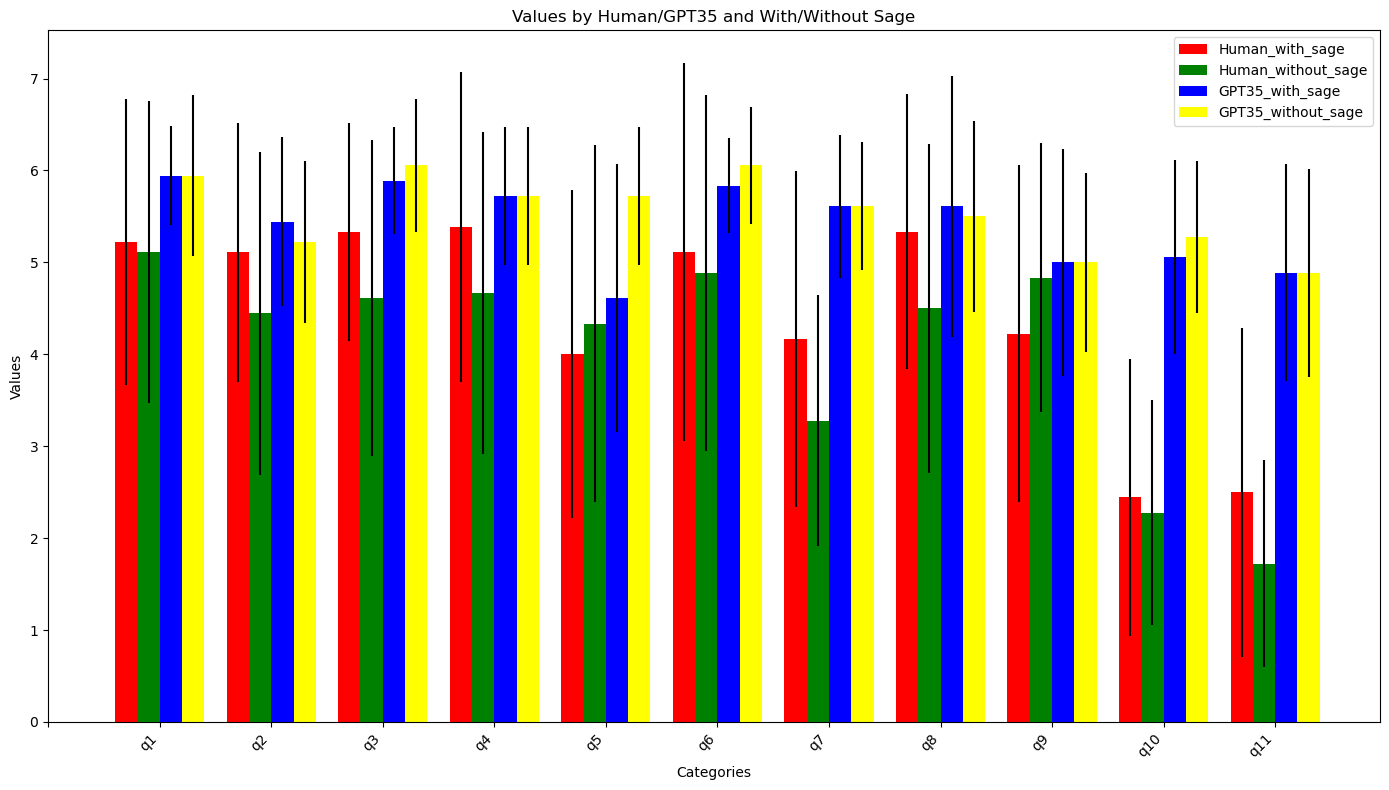

In [132]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.2
offsets = np.linspace(-bar_width*1.5, bar_width*1.5, 4)

# for i, sub in enumerate(subcategories):
#     ax.bar(category_indices + offsets[i], values[:, i], bar_width, label=sub)
# for i in range(11):
    # ax.bar( i + 1 + offsets[0], df_human_with[qs[i]].mean(), bar_width, label="Human_with_sage", color="red")
    # ax.bar( i + 1 + offsets[1], df_huma_without[qs[i]].mean(), bar_width, label="Human_without_sage", color="green")
    # ax.bar( i + 1 + offsets[2], df_ai_with[qs2[i]].mean(), bar_width, label="Human_with_ai", color="blue")
    # ax.bar( i + 1 + offsets[3], df_ai_with[qs2[i]].mean(), bar_width, label="Human_without_ai", color="yellow")
for i in range(11):
    if i == 0:  # Add labels only in the first iteration
        ax.bar(i + 1 + offsets[0], df_human_with[qs[i]].mean(), bar_width, yerr=df_human_with[qs[i]].std(), label="Human_with_sage", color="red")
        ax.bar(i + 1 + offsets[1], df_huma_without[qs[i]].mean(), bar_width, yerr=df_huma_without[qs[i]].std(), label="Human_without_sage", color="green")
        ax.bar(i + 1 + offsets[2], df_ai_with[qs2[i]].mean(), bar_width, yerr=df_ai_with[qs2[i]].std(), label="GPT35_with_sage", color="blue")
        ax.bar(i + 1 + offsets[3], df_ai_without[qs2[i]].mean(), bar_width, yerr=df_ai_without[qs2[i]].std(), label="GPT35_without_sage", color="yellow")
    else:  # Omit labels for subsequent iterations
        ax.bar(i + 1 + offsets[0], df_human_with[qs[i]].mean(), bar_width, yerr=df_human_with[qs[i]].std() , color="red")
        ax.bar(i + 1 + offsets[1], df_huma_without[qs[i]].mean(), bar_width, yerr=df_huma_without[qs[i]].std(),   color="green")
        ax.bar(i + 1 + offsets[2], df_ai_with[qs2[i]].mean(), bar_width, yerr=df_ai_with[qs2[i]].std(),  color="blue")
        ax.bar(i + 1 + offsets[3], df_ai_without[qs2[i]].mean(), bar_width, yerr=df_ai_without[qs2[i]].std(),  color="yellow")

# Add legend and other customizations
ax.legend()

# Adding labels and title
# Customization
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Values by Human/GPT35 and With/Without Sage')
ax.set_xticks(np.arange(12))
ax.set_xticklabels([""] + qs2, rotation=45, ha="right")


plt.tight_layout()
plt.show()

In [124]:
from scipy.stats import ttest_rel

In [126]:
print("--------------------------------------------------------------------------------")
print("----------------------------WITH SAGE AGENT GROUP ------------------------------")
print("--------------------------------------------------------------------------------")
for i in range(11):
    from scipy.stats import ttest_rel

    # Perform the paired sample t-test
    t_stat, p_value = ttest_rel(df_human_with[qs[i]], df_ai_with[qs2[i]])

    print("--------------------------------------------------------------------------------")
    print("Question: " + qs[i])
    print(f"T-statistic: {t_stat}, P-value: {p_value}")
    print()
    print()

    
    
print("--------------------------------------------------------------------------------")
print("---------------------------WITHOUT SAGE AGENT GROUP ----------------------------")
print("--------------------------------------------------------------------------------")
for i in range(11):
    from scipy.stats import ttest_rel

    # Perform the paired sample t-test
    t_stat, p_value = ttest_rel(df_human_with[qs[i]], df_ai_with[qs2[i]])

    print("--------------------------------------------------------------------------------")
    print("Question: " + qs[i])
    print(f"T-statistic: {t_stat}, P-value: {p_value}")
    print()
    print()

--------------------------------------------------------------------------------
----------------------------WITH SAGE AGENT GROUP ------------------------------
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Question: While I was reading the narrative, I could easily picture the events in it taking place.
T-statistic: -2.247044534236042, P-value: 0.03820613412465183


--------------------------------------------------------------------------------
Question: While I was reading the narrative, activity going on in the room around me was on my mind.
T-statistic: -0.7288689868556625, P-value: 0.47600401650746327


--------------------------------------------------------------------------------
Question: I could picture myself in the scene of the events described in the narrative.
T-statistic: -1.9656134827672413, P-value: 0.06589607403782827


--------------------------------